# Statistical Treatment for Datasets

Hacktiv8 PTP Introduction to Data Science Projects 2

Author: [Yoga Perdana Putra](https://github.com/yogaperdana)

***

## 1. Introduction

The aim of this projects is to do practical statistic with Python using the [NYC Property Sales Dataset from Kaggle](https://www.kaggle.com/new-york-city/nyc-property-sales). This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are:
  - Manhattan (1)
  - Bronx (2)
  - Brooklyn (3)
  - Queens (4)
  - Staten Island (5)
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

***

## 2. Data Preparation

The first thing is to importing all libraries that will be used on this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set_style("whitegrid")

Then, reading the downloaded dataset file and assigning to a data frame.

In [2]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv')
print('Data is loaded into a Pandas data frame!')

Data is loaded into a Pandas data frame!


Let's view the top and bottom 5 rows of the dataset.

In [3]:
display(df)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Let's view the dimensions of the dataframe:

In [4]:
print('Total rows   :', df.shape[0])
print('Total columns:', df.shape[1])

Total rows   : 84548
Total columns: 22


According to the [Glossary of Terms](https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf) from New York City Department of Finance, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [5]:
df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1, inplace=True)

Getting basic information about data types of each features in data frame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA (not available). We convert columns to their appropriate data types to obtain NAs.

First, let's check which columns should be categorical.

In [7]:
obj_cols = []
for col in df.columns:
    if df[col].dtype=='object':
        obj_cols.append([col, df[col].nunique()])

display(pd.DataFrame(obj_cols, columns=['Column Name', 'Unique Values']))

,Column Name,Unique Values
0,NEIGHBORHOOD,254
1,BUILDING CLASS CATEGORY,47
2,TAX CLASS AT PRESENT,11
3,BUILDING CLASS AT PRESENT,167
4,ADDRESS,67563
5,APARTMENT NUMBER,3989
6,LAND SQUARE FEET,6062
7,GROSS SQUARE FEET,5691
8,BUILDING CLASS AT TIME OF SALE,166
9,SALE PRICE,10008


This columns should be numeric:
* LAND SQUARE FEET
* GROSS SQUARE FEET
* SALE PRICE
* BOROUGH

This column should be as datetime format:
* SALE DATE

Now leaving only the following columns as categorical:
* NEIGHBORHOOD
* BUILDING CLASS CATEGORY
* TAX CLASS AT PRESENT
* BUILDING CLASS AT PRESENT
* BUILDING CLASS AT TIME OF SALE
* TAX CLASS AT TIME OF SALE

Let's procees them.

In [8]:
numer = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

Checking once again for the features information of data frames.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

Now, our dataset is ready for checking missing values.

In [10]:
missing = df.isnull().sum()/len(df)*100
display(
    pd.DataFrame(
        [missing[missing>0],
        pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], 
        index=['Percent missing', 'How many missing']
    )
)

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
Percent missing,31.049818,32.658372,17.22217
How many missing,26252.000000,27612.000000,14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values.

In [11]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [12]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask(
    (df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET']
)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask(
    (df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET']
)

Next, we're checking for duplicated rows.

In [13]:
print('Total duplicated rows:', sum(df.duplicated()))

Total duplicated rows: 765


In [14]:
display(df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10))

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

Let's drop those duplicates from data frame.

In [15]:
df.drop_duplicates(inplace=True)
print('Total duplicated rows:', sum(df.duplicated()))

Total duplicated rows: 0


BOROUGH values are still in digit code. For a comfortable view, we'll replace it later with value that matches the dataset reference.

In [16]:
borough_names = {
    1: 'MANHATTAN',
    2: 'BRONX',
    3: 'BROOKLYN',
    4: 'QUEENS',
    5: 'STATEN ISLAND',
}

Next, getting numeric columns to use in later aggregations. But we'll excluding BLOCK, LOT and ZIP CODE since those columns are just unique values to identify the location of a property.

In [17]:
cols_exclude = ['BLOCK', 'LOT', 'ZIP CODE']
cols_num_all = df.select_dtypes(include='number').columns.tolist()
cols_num = [e for e in cols_num_all if e not in cols_exclude]
print(cols_num)

['BOROUGH', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']


***

## 3. Exploratory Data Analysis

Now, let's get a simple descriptive statistics for COMMERCIAL UNITS features.

In [18]:
with pd.option_context('display.float_format', lambda x: '{:,.2f}'.format(x)):
    display(df[df['COMMERCIAL UNITS']==0].describe().T)

,count,mean,std,min,25%,50%,75%,max
BOROUGH,"78,777.00",3.00,1.30,1.00,2.00,3.00,4.00,5.00
BLOCK,"78,777.00","4,273.78","3,589.24",1.00,"1,330.00","3,340.00","6,361.00","16,322.00"
LOT,"78,777.00",395.42,671.60,1.00,23.00,52.00,"1,003.00","9,106.00"
ZIP CODE,"78,777.00","10,722.74","1,318.49",0.00,"10,304.00","11,209.00","11,357.00","11,694.00"
RESIDENTIAL UNITS,"78,777.00",1.69,9.84,0.00,0.00,1.00,2.00,889.00
COMMERCIAL UNITS,"78,777.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
TOTAL UNITS,"78,777.00",1.72,9.84,0.00,1.00,1.00,2.00,889.00
LAND SQUARE FEET,"52,780.00","3,140.14","29,299.99",0.00,"1,600.00","2,295.00","3,300.00","4,252,327.00"
GROSS SQUARE FEET,"52,780.00","2,714.61","27,912.94",0.00,975.00,"1,600.00","2,388.00","4,252,327.00"
YEAR BUILT,"78,777.00","1,781.07",551.02,0.00,"1,920.00","1,940.00","1,967.00","2,017.00"


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics for RESIDENTIAL UNITS features.

In [19]:
with pd.option_context('display.float_format', lambda x: '{:,.2f}'.format(x)):
    display(df[df['RESIDENTIAL UNITS']==0].describe().T)

,count,mean,std,min,25%,50%,75%,max
BOROUGH,"24,546.00",2.54,1.33,1.00,1.00,3.00,4.00,5.00
BLOCK,"24,546.00","3,355.27","3,091.22",1.00,"1,158.00","1,947.00","5,390.75","16,317.00"
LOT,"24,546.00",283.94,570.05,1.00,12.00,38.00,135.00,"9,056.00"
ZIP CODE,"24,546.00","10,321.51","2,135.41",0.00,"10,023.00","11,004.00","11,354.00","11,694.00"
RESIDENTIAL UNITS,"24,546.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
COMMERCIAL UNITS,"24,546.00",0.46,15.83,0.00,0.00,0.00,0.00,"2,261.00"
TOTAL UNITS,"24,546.00",0.56,15.83,0.00,0.00,0.00,0.00,"2,261.00"
LAND SQUARE FEET,"9,503.00","7,416.80","80,328.92",0.00,0.00,0.00,"3,250.00","4,252,327.00"
GROSS SQUARE FEET,"9,503.00","8,870.47","78,908.77",0.00,0.00,0.00,"2,500.00","4,252,327.00"
YEAR BUILT,"24,546.00","1,675.53",679.09,0.00,"1,921.00","1,950.00","1,962.00","2,017.00"


Next, let's count total value of BOROUGH features.

In [20]:
df_total = pd.DataFrame(df['BOROUGH'].value_counts())
df_total.rename(columns={'BOROUGH': 'TOTAL'}, index=borough_names, inplace=True)
display(df_total)

,TOTAL
QUEENS,26548
BROOKLYN,23843
MANHATTAN,18102
STATEN ISLAND,8296
BRONX,6994


It can be seen that we have a dataset containing the most data in Queens, following next by Brooklyn.

***

### 3.1. Measure of Central Tendency

Let's start measuring data tendencies with box plots of each features.

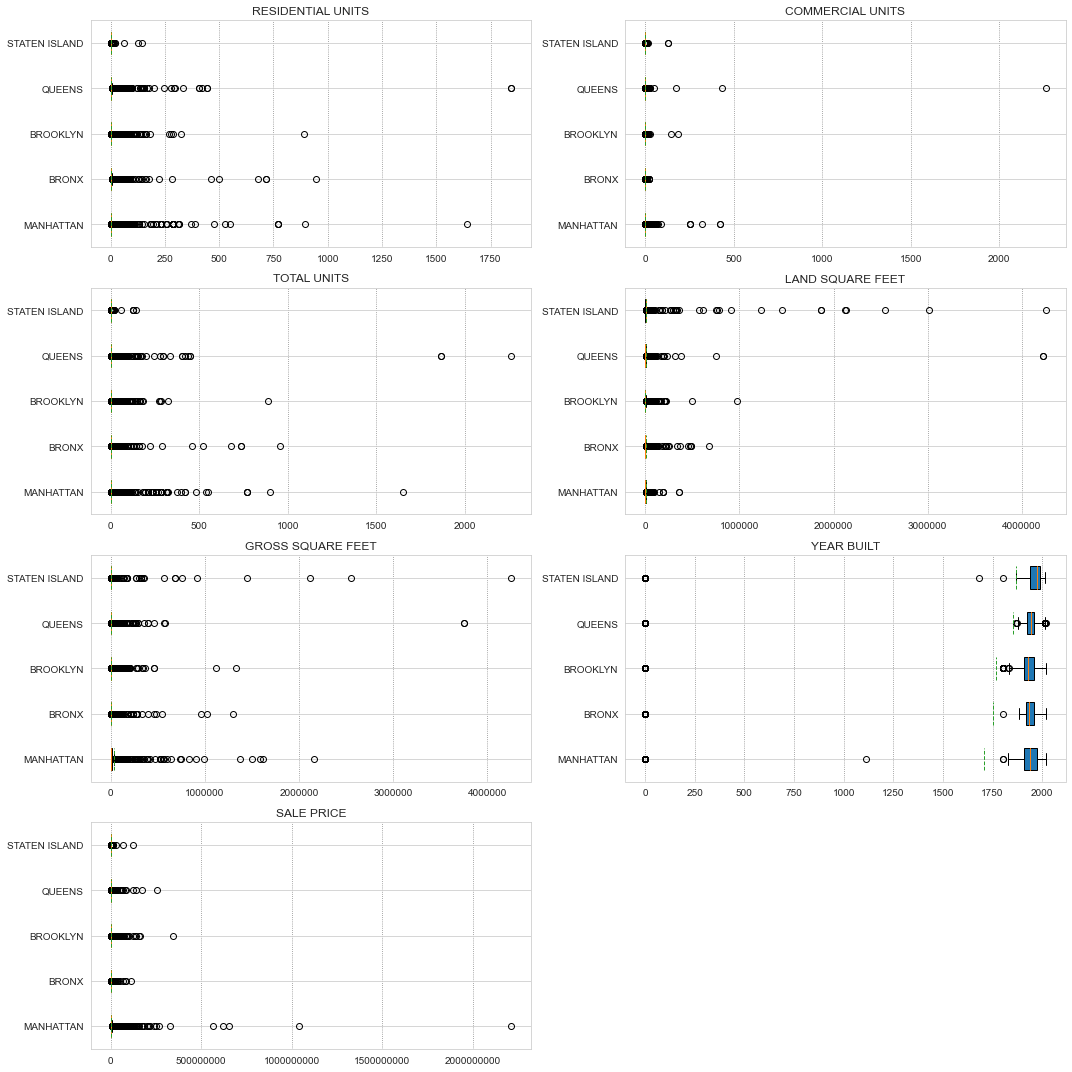

In [21]:
def per_borough(column):
    data = []
    for borough in df['BOROUGH'].unique():
        data.append(df[df['BOROUGH'] == borough][column].dropna(axis=0, how='any').values.tolist())
    return data

def subplots(columns, outliers=True):
    cols = 2
    rows = int(-1 * (-1 * len(columns) / cols))
    fig, ax = plt.subplots(rows, cols, figsize=(15, 15), tight_layout=True)
    
    nrow, ncol = 0, 0
    for c in columns:
        if c != 'BOROUGH':
            ax[nrow][ncol].boxplot(
                per_borough(c), 
                vert=False, showmeans=True, meanline=True, patch_artist=True, showfliers=outliers
            )
            ax[nrow][ncol].title.set_text(c)
            ax[nrow][ncol].ticklabel_format(axis='x', style='plain')
            ax[nrow][ncol].set_yticklabels(list(borough_names.values()))
            ax[nrow][ncol].grid(b=True, which='major', linestyle='dotted', color='gray', axis='x')

            if ncol == (cols-1):
                ncol = 0
                nrow += 1
            else:
                ncol += 1
        else:
            ax[rows-1][cols-1].set_axis_off()
    
    plt.show()

subplots(cols_num)

Of course there are so many data outliers because the data is widely distributed with different circumstances from year to year. But we can hide them and view the clearer boxplots.

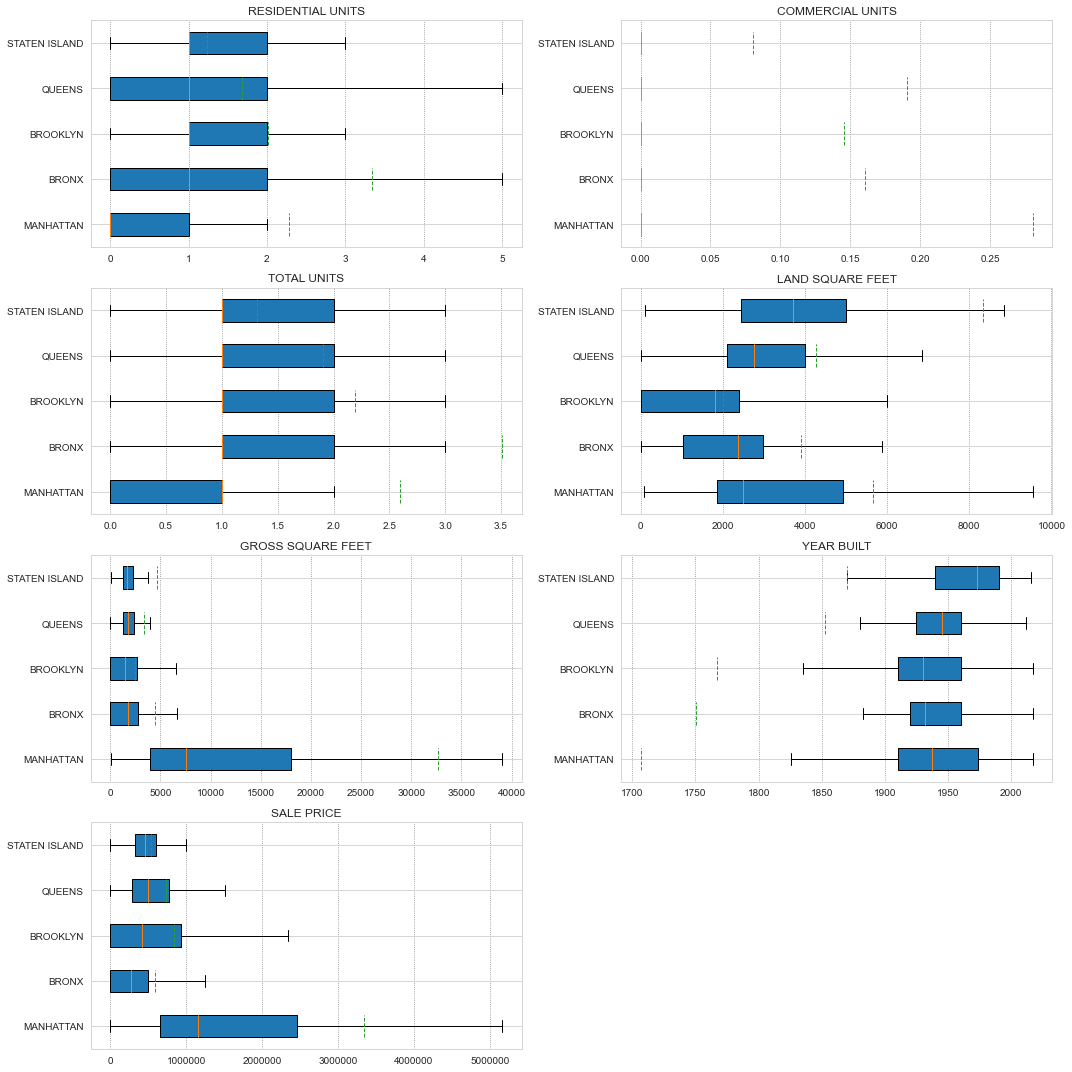

In [22]:
subplots(cols_num, False)

From here, we can calculate the central tendency for each Borough. First, we can calculate the **mean**.

In [23]:
with pd.option_context('display.float_format', lambda x: '{:,.2f}'.format(x)):
    display(df[cols_num].groupby(['BOROUGH']).mean().T.rename(columns=borough_names))

BOROUGH,MANHATTAN,BRONX,BROOKLYN,QUEENS,STATEN ISLAND
RESIDENTIAL UNITS,2.28,3.34,2.01,1.69,1.23
COMMERCIAL UNITS,0.28,0.16,0.15,0.19,0.08
TOTAL UNITS,2.60,3.51,2.19,1.91,1.31
LAND SQUARE FEET,"5,646.95","3,909.01","2,016.06","4,265.25","8,339.84"
GROSS SQUARE FEET,"32,623.00","4,489.15","2,481.76","3,345.84","4,709.37"
YEAR BUILT,"1,706.54","1,750.58","1,767.13","1,852.26","1,869.97"
SALE PRICE,"3,344,641.98","594,677.12","841,083.40","738,882.66","543,611.26"


We can calculate the **median** for each Borough.

In [24]:
with pd.option_context('display.float_format', lambda x: '{:,.2f}'.format(x)):
    display(df[cols_num].groupby(['BOROUGH']).median().T.rename(columns=borough_names))

BOROUGH,MANHATTAN,BRONX,BROOKLYN,QUEENS,STATEN ISLAND
RESIDENTIAL UNITS,0.00,1.00,1.00,1.00,1.00
COMMERCIAL UNITS,0.00,0.00,0.00,0.00,0.00
TOTAL UNITS,1.00,1.00,1.00,1.00,1.00
LAND SQUARE FEET,"2,498.00","2,375.00","1,800.00","2,768.00","3,700.00"
GROSS SQUARE FEET,"7,520.00","1,764.00","1,520.00","1,728.00","1,632.00"
YEAR BUILT,"1,937.00","1,932.00","1,930.00","1,945.00","1,973.00"
SALE PRICE,"1,155,000.00","274,897.00","425,605.00","495,000.00","465,000.00"


We can calculate the **mode** for each Borough.

In [25]:
with pd.option_context('display.float_format', lambda x: '{:,.2f}'.format(x)):
    display(df[cols_num].groupby(['BOROUGH']).agg(pd.Series.mode).T.rename(columns=borough_names))

BOROUGH,MANHATTAN,BRONX,BROOKLYN,QUEENS,STATEN ISLAND
RESIDENTIAL UNITS,0.00,1.00,1.00,1.00,1.00
COMMERCIAL UNITS,0.00,0.00,0.00,0.00,0.00
TOTAL UNITS,1.00,1.00,1.00,1.00,1.00
LAND SQUARE FEET,"2,523.00",0.00,0.00,"4,000.00","4,000.00"
GROSS SQUARE FEET,"112,850.00",0.00,0.00,"2,000.00","1,200.00"
YEAR BUILT,0.00,0.00,0.00,"1,920.00","1,970.00"
SALE PRICE,10.00,0.00,0.00,10.00,10.00


***

### 3.2. Measure of Spread

We can calculate the **range** for each Borough.

In [26]:
with pd.option_context('display.float_format', lambda x: '{:,.2f}'.format(x)):
    display(df[cols_num].groupby(['BOROUGH']).agg(lambda x: x.max() - x.min()).T.rename(columns=borough_names)

BOROUGH,1,2,3,4,5
RESIDENTIAL UNITS,"1,641.00",948.00,889.00,"1,844.00",143.00
COMMERCIAL UNITS,422.00,22.00,184.00,"2,261.00",126.00
TOTAL UNITS,"1,653.00",955.00,889.00,"2,261.00",143.00
LAND SQUARE FEET,"363,912.00","679,000.00","970,000.00","4,228,293.00","4,252,225.00"
GROSS SQUARE FEET,"2,155,404.00","1,303,935.00","1,330,743.00","3,750,558.00","4,252,225.00"
YEAR BUILT,"2,017.00","2,017.00","2,017.00","2,017.00","2,016.00"
SALE PRICE,"2,209,999,999.00","110,000,000.00","345,000,000.00","257,499,999.00","121,999,999.00"


We can calculate the **variance** for each Borough.

In [27]:
with pd.option_context('display.float_format', lambda x: '{:,.2f}'.format(x)):
    display(df[cols_num].groupby(['BOROUGH']).var(ddof=1).T.rename(columns=borough_names)

BOROUGH,1,2,3,4,5
RESIDENTIAL UNITS,496.37,498.68,72.96,328.62,5.33
COMMERCIAL UNITS,39.57,0.77,2.70,201.28,3.97
TOTAL UNITS,542.12,514.45,75.82,535.81,9.17
LAND SQUARE FEET,"272,715,387.72","337,520,921.10","78,828,772.72","2,092,700,715.31","7,797,465,866.74"
GROSS SQUARE FEET,"13,199,302,701.35","868,357,165.33","221,045,457.58","1,738,524,157.66","4,750,796,357.61"
YEAR BUILT,"420,464.58","340,594.44","313,687.76","180,710.06","186,468.09"
SALE PRICE,"582,762,827,117,126.38","7,803,692,804,476.83","15,617,607,153,085.31","10,416,242,290,163.39","3,631,099,702,626.50"


We can calculate the **standard deviation** for each Borough.

In [28]:
with pd.option_context('display.float_format', lambda x: '{:,.2f}'.format(x)):
    display(df[cols_num].groupby(['BOROUGH']).std(ddof=1).T.rename(columns=borough_names)

BOROUGH,1,2,3,4,5
RESIDENTIAL UNITS,22.28,22.33,8.54,18.13,2.31
COMMERCIAL UNITS,6.29,0.88,1.64,14.19,1.99
TOTAL UNITS,23.28,22.68,8.71,23.15,3.03
LAND SQUARE FEET,"16,514.10","18,371.74","8,878.56","45,746.05","88,303.26"
GROSS SQUARE FEET,"114,888.22","29,467.90","14,867.60","41,695.61","68,926.02"
YEAR BUILT,648.43,583.60,560.08,425.10,431.82
SALE PRICE,"24,140,481.09","2,793,509.05","3,951,911.84","3,227,420.38","1,905,544.46"


***

### 3.3. Probability Distribution

From now, we will analyze distribution for SALE PRICE to know the **probability distribution** of them.

First, we need to write a function to build subplots with histogram of overall and each boroughs.

In [29]:
def subhistplots(queries, titles, colors, suptitle, xlabel):
    cols = 2
    rows = int(-1 * (-1 * len(queries) / cols))
    
    fig, axs = plt.subplots(rows, cols, figsize=(15, 12), tight_layout=True)
    fig.suptitle(suptitle, fontsize='xx-large')

    nrow, ncol = 0, 0
    for idx, q in enumerate(queries):
        sns.histplot(q, ax=axs[nrow][ncol], kde=True, stat='probability', color=colors[idx], bins=50)
        
        axs[nrow][ncol].set_title(titles[idx], fontsize='large', fontweight='bold')
        axs[nrow][ncol].set_xlabel(xlabel)
        axs[nrow][ncol].ticklabel_format(axis='x', style='plain')
        axs[nrow][ncol].margins(x=0)
        #axs[nrow][ncol].spines['bottom'].set_color('black')
        axs[nrow][ncol].spines['top'].set_color('black')
        axs[nrow][ncol].spines['right'].set_color('black')
        axs[nrow][ncol].spines['left'].set_color('black')
        axs[nrow][ncol].spines['top'].set_linewidth(1)
        axs[nrow][ncol].spines['right'].set_linewidth(1)
        axs[nrow][ncol].spines['left'].set_linewidth(1)
        
        if ncol == (cols-1):
            ncol = 0
            nrow += 1
        else:
            ncol += 1

    plt.show()

titles = ['OVERALL']
for b in borough_names.values():
    titles.append(b)

colors = ['g', 'C0', 'C0', 'C0', 'C0', 'C0']

Next, we will draw the data distribution histogram of sale price and limit the price from \\$10,000 to \\$5 millions to avoid outliers.

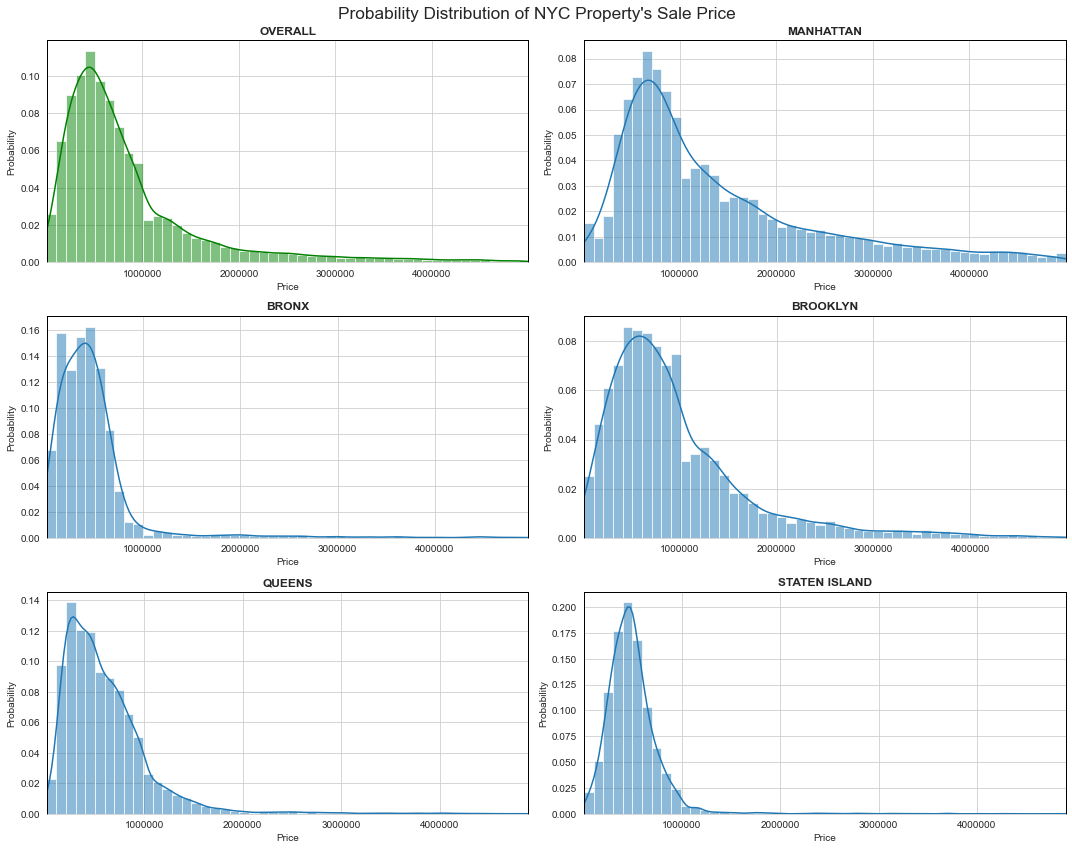

In [30]:
queries = [df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE']]
for u in df['BOROUGH'].unique():
    queries.append(df[
        (df['SALE PRICE'] > 10000) 
        & (df['SALE PRICE'] < 5000000) 
        & (df['BOROUGH'] == u)
    ]['SALE PRICE'])

subhistplots(queries, titles, colors, "Probability Distribution of NYC Property's Sale Price", "Price")

It's difficult to characterize the distribution type from the plots above. The chart's peak is roughly between 10,000 - 1 million.

In Manhattan, we can see that there are many high price properties, makes it slightly boost up the right valley portion of the graph. We can lookup again the detail for the distribution shape if we do filtering for sale price between \\$10,000 to \\$1,000,000.

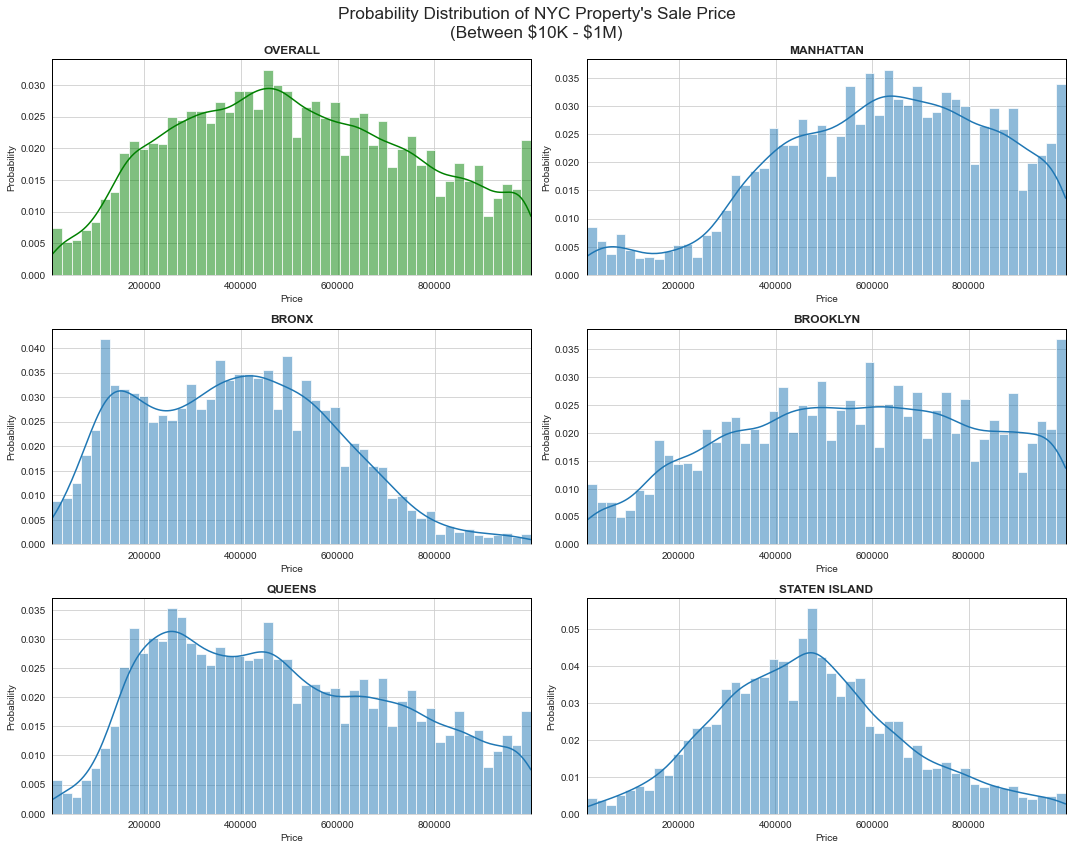

In [31]:
queries = [df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 1000000)]['SALE PRICE']]
for u in df['BOROUGH'].unique():
    queries.append(df[
        (df['SALE PRICE'] > 10000) 
        & (df['SALE PRICE'] < 1000000) 
        & (df['BOROUGH'] == u)
    ]['SALE PRICE'])

subhistplots(queries, titles, colors, 
             "Probability Distribution of NYC Property's Sale Price\n(Between \$10K - \$1M)", "Price")

***

### 3.4. Confidence Intervals

We will analyze the **confidence intervals** (CI) of COMMERCIAL UNITS.

First of all, we have to take columns RESIDENTIAL UNITS and COMMERCIAL UNITS. Then, drop the missing values.

In [32]:
dx = df[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS']].dropna()
#display(pd.crosstab(dx['RESIDENTIAL UNITS'], dx['COMMERCIAL UNITS']))

Calculating total units based on both columns and COMMERCIAL UNITS itself. 

In [33]:
total_units = dx.sum().sum()
print('Total Units:', total_units)

com_units = dx.sum()['COMMERCIAL UNITS']
print('Commercial Units:', com_units)

Total Units: 182953
Commercial Units: 15389


Next, getting the proportion for COMMERCIAL UNITS.

In [34]:
prop_com = com_units/total_units
print('Proportion of Commercial Units: ' + str(round(prop_com*100, 3)) + '%')

Proportion of Commercial Units: 8.411%


After that, we will get the standard error (SE) value using the formula for the standard error for population proportion.

In [35]:
se_com = np.sqrt(prop_com * (1 - prop_com) / total_units)
print('Standard Error (SE) for Commercial Units:', se_com)

Standard Error (SE) for Commercial Units: 0.0006489126738715949


We are going to construct the confidence interval of Commercial Units' proportion with **confidence level of 95%**. The **z-score** for that level is **1.96**.

In [36]:
z_score = 1.96

lcb = prop_com - z_score * se_com
ucb = prop_com + z_score * se_com

print('CI\'s Lower limit:', lcb)
print('CI\'s Upper limit:', ucb)

print('CI\'s range is between ' + str(round(lcb*100, 3)) + '% - ' + str(round(ucb*100, 3)) + '%')

CI's Lower limit: 0.08284263051150434
CI's Upper limit: 0.08538636819308099
CI's range is between 8.284% - 8.539%


That means **the true proportion of Commercial Units will fall between 8.284% - 8.539%**.

Next, we are going to calculate the CI of Commercial Units' mean. We need to know the mean and standard deviation for Commercial Units.

In [37]:
mean_com = dx.mean()['COMMERCIAL UNITS']
print('Mean of Commercial Units:', mean_com)

std_com = dx.std()['COMMERCIAL UNITS']
print('Standard Deviation of Commercial Units:', std_com)

Mean of Commercial Units: 0.18367687955790554
Standard Deviation of Commercial Units: 8.576582172908003


Calculate the standard error using the formula for the standard error for the mean.

In [38]:
se_com_mean = std_com / np.sqrt(total_units)
print('Standard Errors (SE):', se_com_mean)

Standard Errors (SE): 0.020051390056616762


We are going to construct the confidence interval of Commercial Units' mean. Same as before, we are using confidence level of 95% with z-score is 1.96.

In [39]:
lcb = mean_com - z_score * se_com_mean
ucb = mean_com + z_score * se_com_mean

print('CI\'s Lower limit:', lcb)
print('CI\'s Upper limit:', ucb)

print('CI\'s range is between ' + str(round(lcb, 3)) + ' - ' + str(round(ucb, 3)))

CI's Lower limit: 0.14437615504693668
CI's Upper limit: 0.2229776040688744
CI's range is between 0.144 - 0.223


It means **the true mean of Commercial Units will fall between 0.144 - 0.223 units**. _It's below one unit?!_

***

### 3.5. Hypothesis Testing

We are going to make a hypothesis testing about property sale prices between Manhattan and Brooklyn.
> **Is the average selling price of properties in Manhattan higher than in Brooklyn?**

**Population**: \
Sale Price in Manhattan and Sale Price in Brooklyn

**Parameter of interests**: \
μ1 = SALE PRICE in borough no. 1 (Manhattan) \
μ2 = SALE PRICE in borough no. 3 (Brooklyn)

**Null hypothesis**: \
The average selling price of the property in Manhattan is equal to Brooklyn. ($H_0 \Rightarrow μ_1 = μ_2$)

**Alternative hypothesis**: \
The average selling price of the property in Manhattan is greater than in Brooklyn. ($H_a \Rightarrow μ_1 \gt μ_2$)

In [87]:
df_sp_man = df[df['BOROUGH'] == 1]['SALE PRICE'].dropna()
df_sp_bro = df[df['BOROUGH'] == 3]['SALE PRICE'].dropna()

print('Average selling price in Manhattan:', '%10.2f' % (round(df_sp_man.mean(), 2)))
print('Average selling price in Brooklyn: ', '%10.2f' % (round(df_sp_bro.mean(), 2)))

Average selling price in Manhattan: 3344641.98
Average selling price in Brooklyn:   841083.40


In [70]:
ztest, pval = sm.stats.ztest(df_sp_man, value=df_sp_bro.mean(), alternative='larger')
print(ztest, pval)

if pval < 0.05:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

12.43370784548524 8.574573414930683e-36
Reject null hypothesis


Since the calculated p-value of the z-test is lower than the standard confidence level, which is 0.05, we can reject the null hypothesis that the average selling price of the property in Manhattan is equal to Brooklyn. There is strong evidence in support for the alternatine hypothesis that the average selling price of the property in Manhattan is greater than in Brooklyn.

***

## 4. Overall Analysis

We have analyzed and visualized various data from the New York City Property Sales Dataset. The most recently built property data was recorded in 2017. We've found that our dataset has most entries in Queens borough. However, the highest average property sales were found to be in Manhattan because there are so many high-priced properties there. It can also be seen that the average gross square feet in Manhattan is wider than the other boroughs.

We have also looked at the distribution of the sale price data from across the boroughs. Data peaks are roughly range between 0 to 1 million US dollars, with note that there are so many outliers of sales occur with a nonsensically small dollar amount: $0 most commonly because these sales are actually transfers of deeds between parties.

We've analyzed the confidence intervals of commercial units, compared to residential units. We've found that with confidence level of 95%, the true proportion of commercial units falls between 8.284%-8.539% and the true mean of commercial units falls between 0.144-0.223 units.

Lastly, we have made a hypothesis testing to test a question about the average selling price of properties in Manhattan and Brooklyn. Our z-test has resulted in reject the null hypothesis, concludes that the average selling price of the property in Manhattan is greater than in Brooklyn.